<a href="https://colab.research.google.com/github/guilhsantos/Modelo_de_Regressao_para_Marketing/blob/main/Modelo_de_Regress%C3%A3o_para_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# PASSO 1: Análise Descritiva




*   Conectando no drive




In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


*   Importando as bibliotecas



In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



*   Carregando o dataset MKT.csv




In [3]:
from google.colab import files
upload = files.upload()

Saving MKT.csv to MKT.csv


*   Visualizando as primeiras linhas do dataset




In [24]:
df = pd.read_csv('MKT.csv', sep=',')
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


*   Informações gerais do dataset


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


*   Verificando valores nulos




In [7]:
df.isnull().sum()

,0
youtube,0
facebook,0
newspaper,0
sales,0


*   Estatísticas descritivas de cada coluna



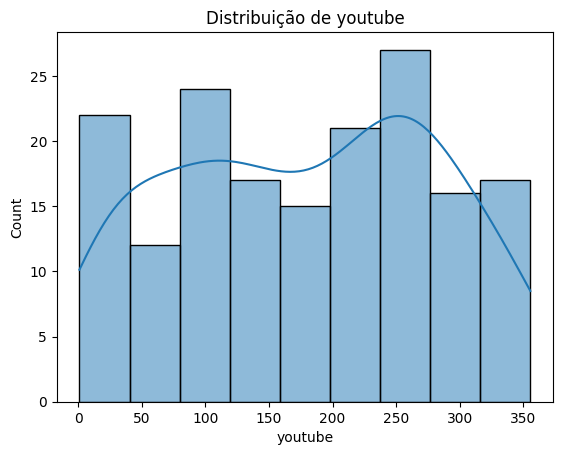

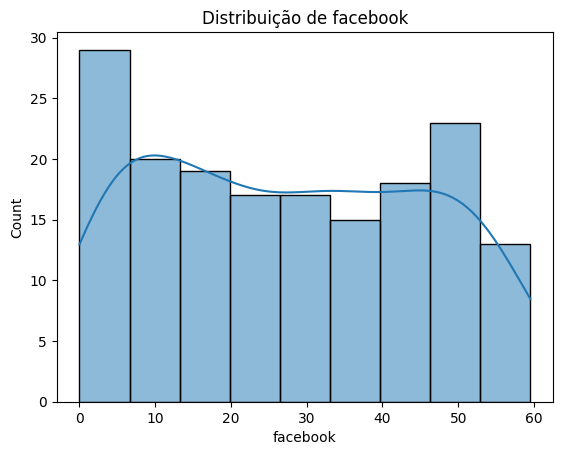

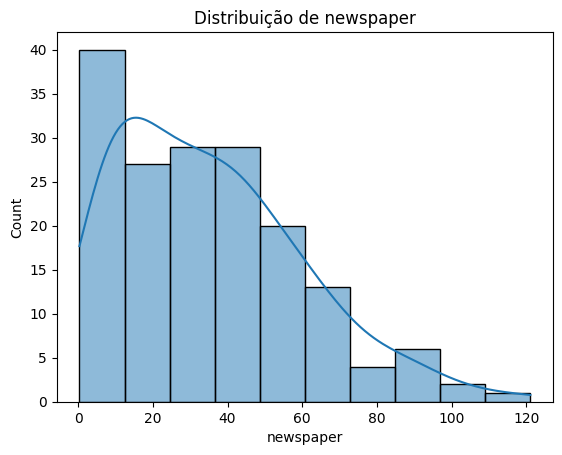

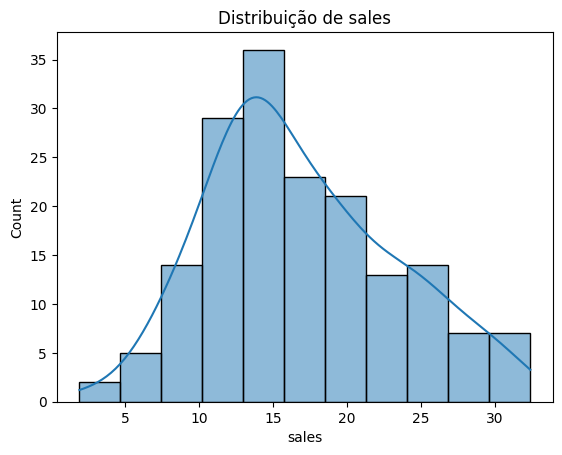

In [16]:
colunas_investimento = ['youtube', 'facebook', 'newspaper', 'sales']
for coluna in colunas_investimento:
    sns.histplot(df[coluna], kde=True)
    plt.title(f'Distribuição de {coluna}')
    plt.show()

# PASSO 2: Análise Exploratória

*   Visualizando a distribuição de investimentos e vendas



In [8]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


*   Pairplot para analisar correlação entre os investimentos e as vendas



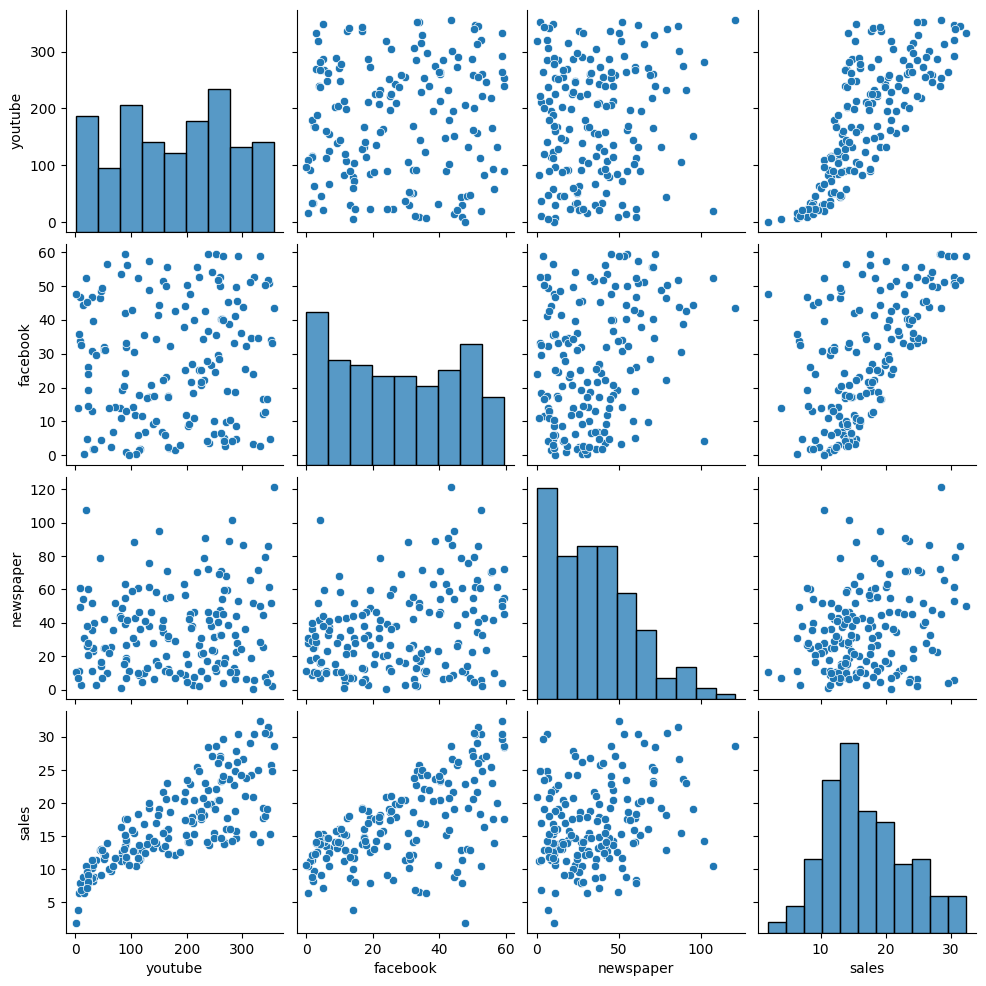

In [18]:
sns.pairplot(df)
plt.show()

*   Matriz de correlação com valores mais detalhados


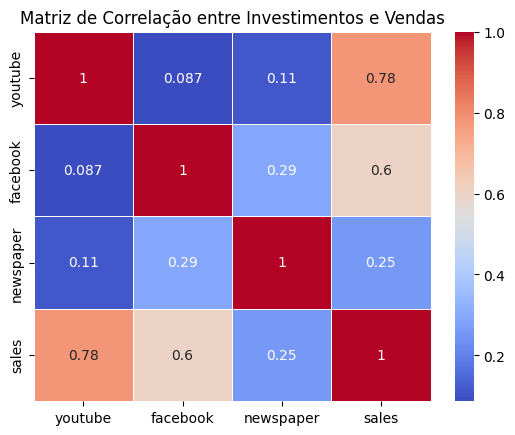

In [19]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação entre Investimentos e Vendas')
plt.show()

# PASSO 3: Modelagem



*   Regressão Linear do SKLEARN https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression



In [25]:
X = df[['youtube','facebook','newspaper']]
y = df[['sales']]

## Suposições da Modelagem
Apenas variáveis numéricas foram utilizadas no modelo.

## Desenho do teste
Divisão do Dataset:
O dataset foi dividido em treino e teste, utilizando uma separação padrão de 80% dos dados para treino e 20% para teste, por meio do método train_test_split da biblioteca SKLEARN.

## Métricas de Avaliação do Modelo:
Foram utilizadas as métricas **MSE (Mean Squared Error)** e **RMSE (Root Mean Squared Error)**, que penalizam grandes erros de previsão. Ambas as métricas foram calculadas com o método mean_squared_error da biblioteca SKLEARN (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

Além disso, foi utilizada a métrica **R² (Coeficiente de Determinação)** para avaliar a qualidade do ajuste do modelo, que indica a proporção da variabilidade da variável dependente (vendas) explicada pelas variáveis independentes (investimentos em marketing). O cálculo do R² foi feito utilizando o método r2_score da biblioteca SKLEARN (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
regLinear = LinearRegression().fit(X_train, y_train)

# PASSO 4: Calculando Predição

In [35]:
yPredLinear = regLinear.predict(X_test)

In [36]:
print(yPredLinear)

[[12.98143963]
 [25.0567515 ]
 [18.23740714]
 [20.62856013]
 [11.58829542]
 [ 8.56498386]
 [13.34769213]
 [23.17303975]
 [12.02633774]
 [24.95658385]
 [10.22642185]
 [13.42592269]
 [13.98390345]
 [11.02921411]
 [20.75850022]
 [26.45365807]
 [28.93272026]
 [21.7591148 ]
 [21.250927  ]
 [24.16369214]
 [20.67745028]
 [ 9.84089667]
 [19.43433157]
 [18.23654615]
 [14.28836092]
 [26.10738797]
 [20.88069217]
 [10.57749746]
 [12.21748717]
 [23.14056427]
 [ 7.00528355]
 [ 8.46444339]
 [16.59917838]
 [21.84022174]
 [18.1370266 ]]


In [40]:
MSELinear = mean_squared_error(y_test, yPredLinear)

In [45]:
r2Linear = r2_score(y_test, yPredLinear)

In [46]:
print('MSE Linear: ', MSELinear)
print('RMSE Linear: ', np.sqrt(MSELinear))
print('R² Linear: ', r2Linear)

MSE Linear:  5.576790234026713
RMSE Linear:  2.361522863329236
R² Linear:  0.872863085701216


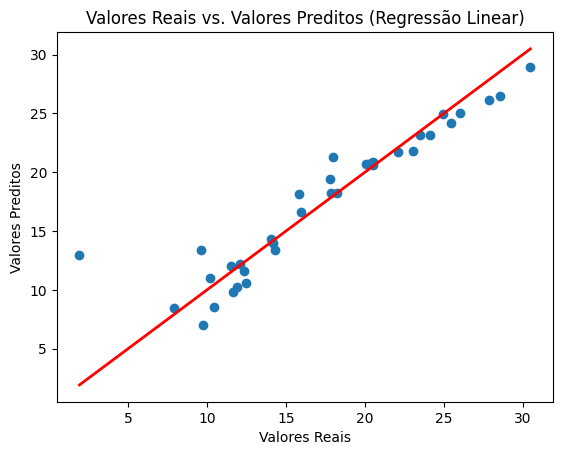

In [47]:
plt.scatter(y_test, yPredLinear)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Linha de referência (y=x)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs. Valores Preditos (Regressão Linear)')
plt.show()

## Teste de predição com valores

In [63]:
# Inserir valores para testar a predição
novo_investimento = pd.DataFrame([[96.24, 0, 11.04]], columns=['youtube', 'facebook', 'newspaper'])

# Fazendo a predição com o modelo treinado
predicao_vendas = regLinear.predict(novo_investimento)

# Exibindo a predição
print(f'A quantidade de vendas prevista para os investimentos fornecidos é: {predicao_vendas[0][0]:.2f}')

A quantidade de vendas prevista para os investimentos fornecidos é: 7.95
